<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2024/blob/main/Module%201/5_Functional_Fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Spring 2024 Course on mathematic methods.
- Instructor Sergei V. Kalinin, sergei2@utk.edu

# Fitting scalar functions

## Linear regression

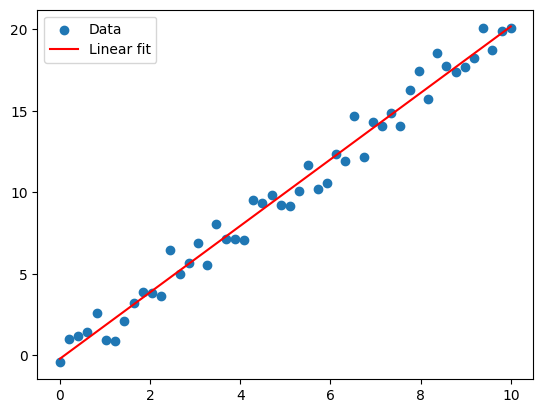

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Generate model data
x = np.linspace(0, 10, 50)
y = 2 * x + np.random.normal(0, 1, 50)  # Linear with some noise

# Linear Fit
slope, intercept, _, _, _ = linregress(x, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Linear fit')
plt.legend()
plt.show()

Exercise:
- What are the other two parameters returned by the linregress(x,y)
- How would the values of the slope and intersect change if we add more noise to data?
- Add a parabolic term to data and experiment with the noise. When do you still see it (meaning the error bar is sufficiently broad that parabolic term is signficantly different from 0)?

## Polynomial fit

Coefficients are:  [ 0.08876221 -0.34773065  2.56027777]
The polynomial is: 
         2
0.08876 x - 0.3477 x + 2.56


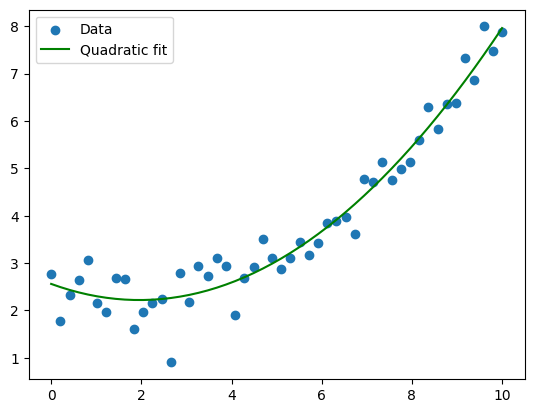

In [30]:
# Generate model data
y = 0.1 * x**2 - 0.5 * x + 3 + np.random.normal(0, 0.5, 50)

# Fit a quadratic polynomial
coeffs = np.polyfit(x, y, 2)
print("Coefficients are: ", coeffs)

# Generate polynomial function
p = np.poly1d(coeffs)
print("The polynomial is: ")
print(p)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, p(x), color='green', label='Quadratic fit')
plt.legend()
plt.show()

Explore the behavior of the polyfit(x,y) function
- How would you use it to get error bars for the coefficients?
- What will happen if you try to fit the data generated with only parabolic fucntion by the 3d degree polynomial?
- How would you fit the data to the function a + c x^2 (where the coefficient before linea rterm is xactly zero)?

## Exponential fit

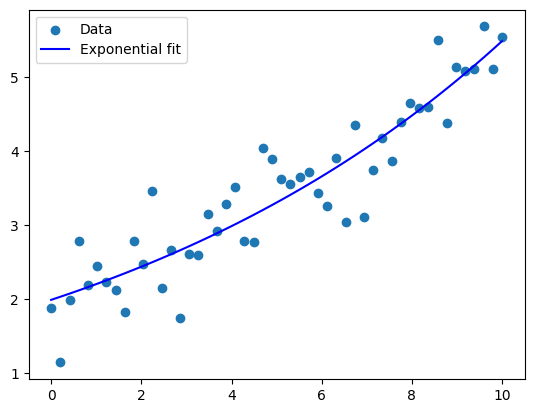

In [31]:
from scipy.optimize import curve_fit

# Exponential function model
def exp_model(x, a, b):
    return a * np.exp(b * x)

# Generate model data
y = exp_model(x, 2, 0.1) + np.random.normal(0, 0.5, 50)

# Fit data to the model
params, _ = curve_fit(exp_model, x, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, exp_model(x, *params), color='blue', label='Exponential fit')
plt.legend()
plt.show()

Explore the curve_fit function
- What are the parameters it returns?
- How would you estimate the values of the errors of the coefficients?
- What functions does it minimize?
- What algorithm does it use to find parameters?
- Are the initial guesses for parameter values important?

## Sinusoidal fit

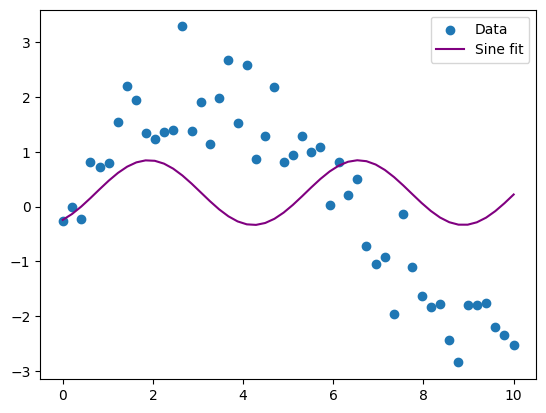

In [32]:
# Sine function model
def sine_model(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset

# Generate model data
y = sine_model(x, 2, 0.5, 0, 0) + np.random.normal(0, 0.5, 50)

# Fit data
params, _ = curve_fit(sine_model, x, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, sine_model(x, *params), color='purple', label='Sine fit')
plt.legend()
plt.show()

It looks like the sinusoidal fit does not work particularly well.
- Any thoughts on why did it happen?
- How would you improve it?
- Compare the error bars for the "correct" and "incorrect" fit?

## Power law fit

<ipython-input-33-d089f6473a4e>:3: RuntimeWarning: divide by zero encountered in power
  return a * x**b
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


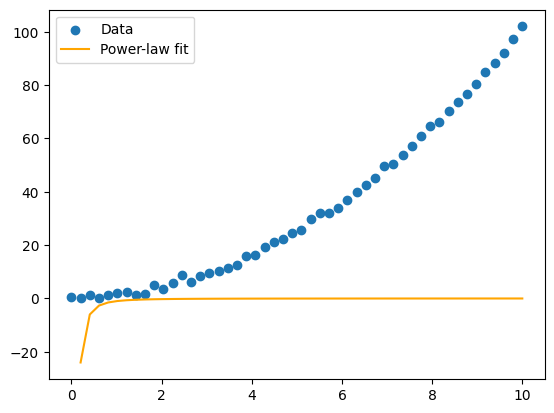

In [33]:
# Power-law model
def power_law(x, a, b):
    return a * x**b

# Generate model data
y = power_law(x, 1, 2) + np.random.normal(0, 1, 50)

# Fit data
params, _ = curve_fit(power_law, x, y, p0 = [-1, -2])

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, power_law(x, *params), color='orange', label='Power-law fit')
plt.legend()
plt.show()

Looks like this fit is also not supergood.
- Any thoughts as to why?
- Experiment with the p0 and suggest the way to improve it.

## Gaussian fit

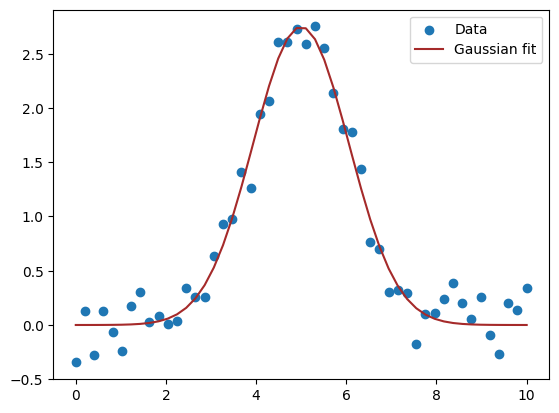

In [34]:
# Gaussian model
def gaussian(x, amplitude, mean, std_dev):
    return amplitude * np.exp(-((x - mean)**2) / (2 * std_dev**2))

# Generate model data
y = gaussian(x, 3, 5, 1) + np.random.normal(0, 0.2, 50)

# Fit data
params, _ = curve_fit(gaussian, x, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, gaussian(x, *params), color='brown', label='Gaussian fit')
plt.legend()
plt.show()

Experiment with this function. In particular, explore what happens is
- If ground truth value of std_dev is changed by a facotr of 1, 3, 5 10, 30 towards increase and towards decrease
- How would this behavior be affected by noise? Try noise 3 and 10 times larger, 3 times smaller, and no noise.

## Custom function

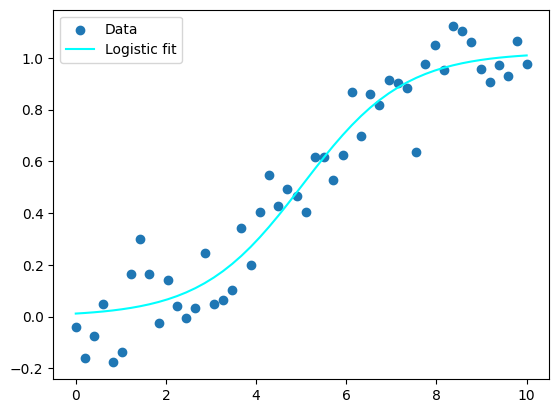

In [35]:
# Logistic model
def logistic_model(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Generate model data
y = logistic_model(x, 1, 1, 5) + np.random.normal(0, 0.1, 50)

# Fit data
params, _ = curve_fit(logistic_model, x, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, logistic_model(x, *params), color='cyan', label='Logistic fit')
plt.legend()
plt.show()

Exercise:
- Create your own function and try it on this data
- What logic will you use in selecting the function?

## Fitting special functions

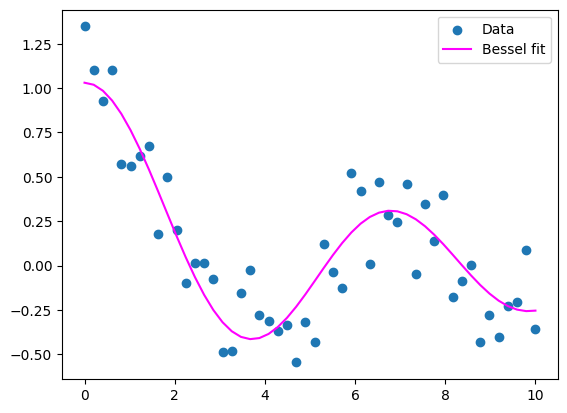

In [36]:
from scipy.special import jn  # Bessel function of the first kind

# Bessel function model
def bessel_model(x, a, b):
    return a * jn(0, b * x)

# Generate model data
y = bessel_model(x, 1, 1) + np.random.normal(0, 0.2, 50)

# Fit data
params, _ = curve_fit(bessel_model, x, y)

# Plot
plt.scatter(x, y, label='Data')
plt.plot(x, bessel_model(x, *params), color='magenta', label='Bessel fit')
plt.legend()
plt.show()

So, now you can do fits!

# Multivariate fits

## Linear fit

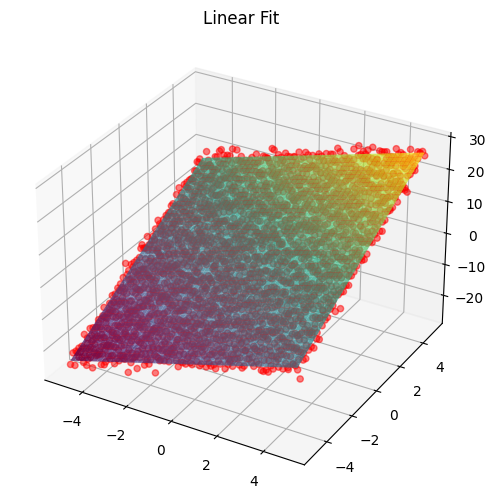

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Define the linear model function
def linear_model(X, a, b, c):
    x, y = X
    return a * x + b * y + c

# Generate model data for the linear fit
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y) #A

z_linear = linear_model((x, y), 2, 3, 1) + np.random.normal(0, 1.5, x.shape)

# Fit the linear model to the data
params_linear, _ = curve_fit(linear_model, (x.ravel(), y.ravel()), z_linear.ravel()) #B

# Generate fitted surface for the linear model
z_fit_linear = linear_model((x, y), *params_linear) #C

# Visualization of the linear fit
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(x, y, z_fit_linear, cmap='viridis', alpha=0.7)
ax1.scatter(x, y, z_linear, color='red', alpha=0.5)  # Plot the original data points
ax1.set_title('Linear Fit')
plt.show()

Go though the code above step by step. What is going on"
1. In the line #A? What does meshgrid do?
2. Why do we use .ravel() in #B?
3. Why do we use argument *params_linear in #C? What is the star for?

## Gaussian fit

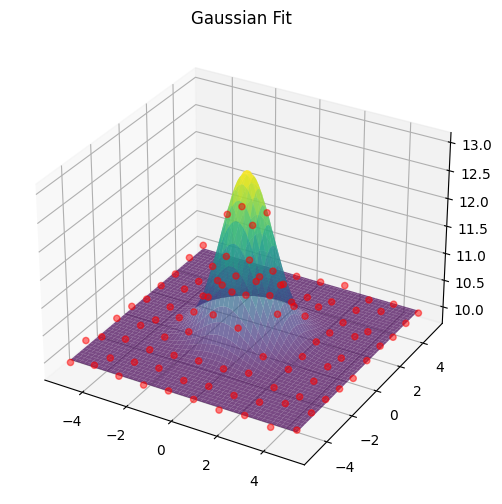

In [38]:
# Define the 2D Gaussian model function
def gaussian_2d(X, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = X
    a = (np.cos(theta)**2) / (2*sigma_x**2) + (np.sin(theta)**2) / (2*sigma_y**2)
    b = -(np.sin(2*theta)) / (4*sigma_x**2) + (np.sin(2*theta)) / (4*sigma_y**2)
    c = (np.sin(theta)**2) / (2*sigma_x**2) + (np.cos(theta)**2) / (2*sigma_y**2)
    g = offset + amplitude * np.exp(-(a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()

# data
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)

# Generate model data for the Gaussian fit
amplitude, xo, yo, sigma_x, sigma_y, theta, offset = 3, 0, 0, 1, 1, 0, 10
z_gaussian = gaussian_2d((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset)
z_gaussian += np.random.normal(0, 0.05, z_gaussian.shape)

# Fit the Gaussian model to the data
initial_guess = [3, 0, 0, 1, 1, 0, 10]
params_gaussian, _ = curve_fit(gaussian_2d, (x.ravel(), y.ravel()), z_gaussian.ravel(), p0=initial_guess)

# plot mesh
xx = np.linspace(-5, 5, 100)
yy = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(xx, yy)

# Generate fitted surface for the Gaussian model
z_fit_gaussian = gaussian_2d((xx, yy), *params_gaussian).reshape(xx.shape)

# Visualization of the Gaussian fit
fig = plt.figure(figsize=(6, 6))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xx, yy, z_fit_gaussian, cmap='viridis', alpha=0.7)
ax2.scatter(x, y, z_gaussian, color='red', alpha=0.5)  # Plot the original data points
ax2.set_title('Gaussian Fit')
plt.show()

Go though the code of the example and identify:
1. Where is the data generated
2. What part is the function fit
3. How do we plot the function?

# Delving into least squares

## Illustration of data, fit, and residues

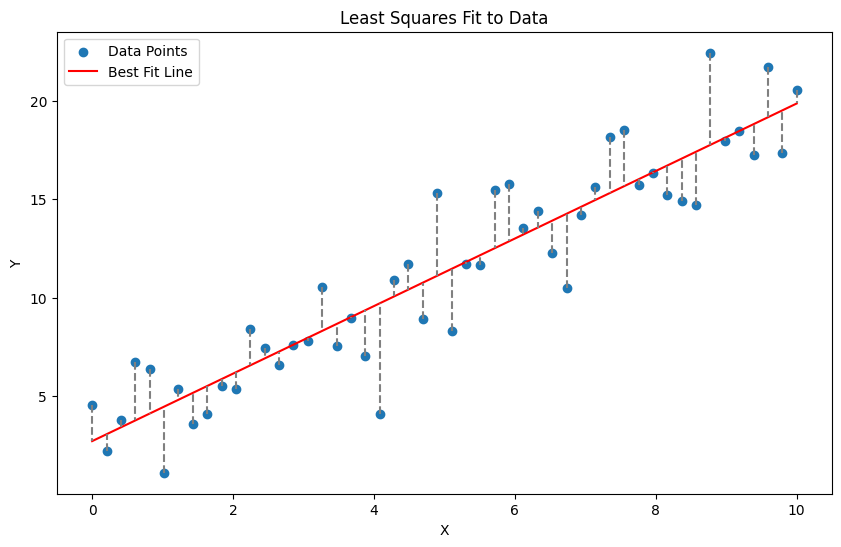

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(0, 2, 50)  # Linear relationship with some noise

# Perform a linear least squares regression
slope, intercept, _, _, _ = linregress(x, y)
y_pred = slope * x + intercept

# Calculate residuals
residuals = y - y_pred

# Visualization
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(x, y, label='Data Points')

# Plot the best fit line
plt.plot(x, y_pred, color='red', label='Best Fit Line')

# Plot the residuals
for xi, yi, ri in zip(x, y, residuals): #A
    plt.plot([xi, xi], [yi, yi - ri], color='gray', linestyle='--') #B

plt.title('Least Squares Fit to Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Explore the code
1. What does the zip function do in #A
2. What does code do in #B

## Error surface

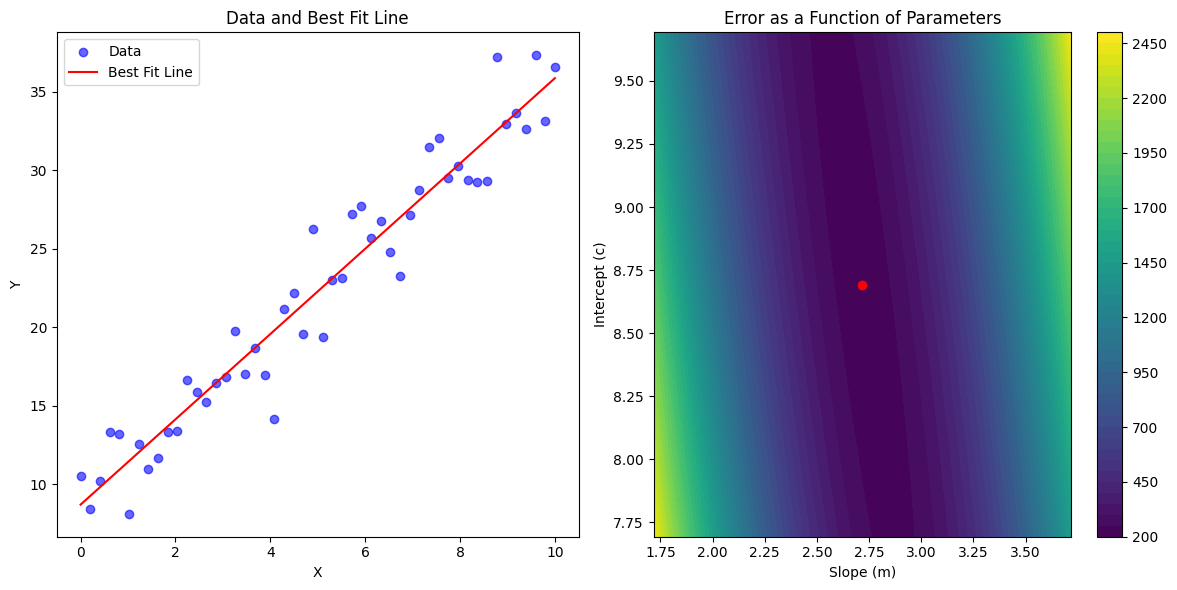

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a synthetic dataset
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = 3 * x + 7 + np.random.normal(0, 2, 50)  # Linear relationship with noise

# Least Squares Fitting
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Best fit line
y_fit = m * x + c

# Error function calculation
def error_function(m, c, x, y):
    """Calculate the sum of the squares of the residuals."""
    return np.sum((y - (m * x + c))**2)

# Generate a range of values for m and c
m_values = np.linspace(m - 1, m + 1, 100)
c_values = np.linspace(c - 1, c + 1, 100)

# Calculate the error for each combination of m and c
M, C = np.meshgrid(m_values, c_values) #A
error = np.array([error_function(mi, ci, x, y) for mi, ci in zip(M.ravel(), C.ravel())]) #B
error = error.reshape(M.shape) #C

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Data and Fit
ax[0].scatter(x, y, color='blue', alpha=0.6, label='Data')
ax[0].plot(x, y_fit, color='red', label='Best Fit Line')
ax[0].set_title('Data and Best Fit Line')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend()

# Plot 2: Error Surface
cp = ax[1].contourf(M, C, error, levels=50, cmap='viridis')
fig.colorbar(cp, ax=ax[1])
ax[1].set_title('Error as a Function of Parameters')
ax[1].set_xlabel('Slope (m)')
ax[1].set_ylabel('Intercept (c)')
ax[1].plot(m, c, 'ro')  # Mark the minimum error point

plt.tight_layout()
plt.show()


Exercise:
1. What happens in #A
2. What happens in #B
3. What happens in #C

## Error surface in 3D

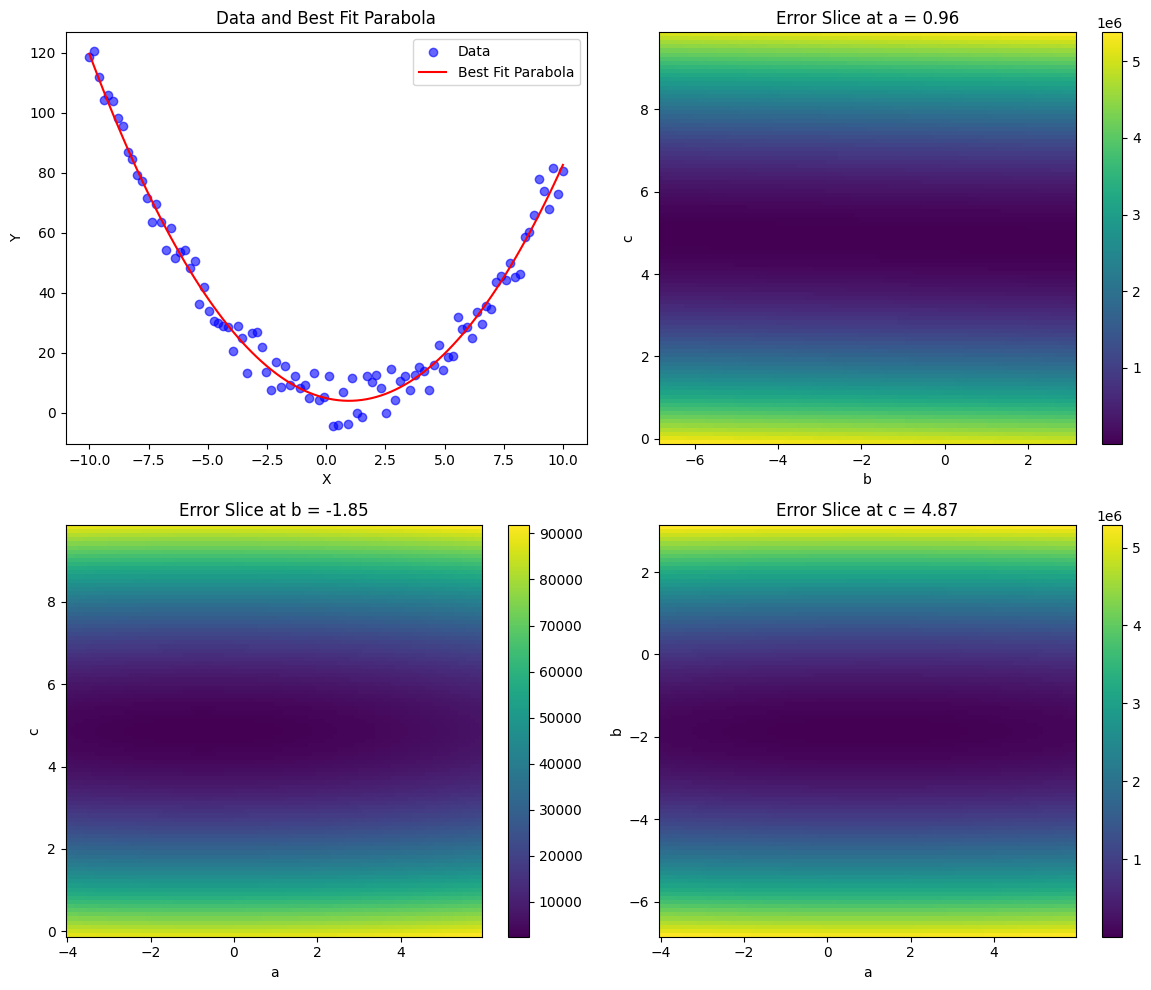

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the parabolic model function
def parabolic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Generate synthetic data
x = np.linspace(-10, 10, 100)
y = 1 * x**2 - 2 * x + 3 + np.random.normal(0, 5, len(x))  # Parabolic relationship with noise

# Fit the parabolic model to the data
params, _ = curve_fit(parabolic_model, x, y)
a_fit, b_fit, c_fit = params

# Best fit parabola
y_fit = parabolic_model(x, *params)

# Error function
def error_function(a, b, c, x, y):
    return np.sum((y - (a * x**2 + b * x + c))**2)

# Generate a range of values for a, b, and c
a_values = np.linspace(a_fit - 5, a_fit + 5, 100)
b_values = np.linspace(b_fit - 5, b_fit + 5, 100)
c_values = np.linspace(c_fit - 5, c_fit + 5, 100)

# Calculate the error for each combination of a, b, and c
A, B, C = np.meshgrid(a_values, b_values, c_values, indexing='ij')
error = np.array([error_function(ai, bi, ci, x, y) for ai, bi, ci in zip(A.flatten(), B.flatten(), C.flatten())])
error = error.reshape(A.shape)

# Slices of error surface at fixed a, b, and c
error_slice_a = error[:, error.shape[1]//2, :]
error_slice_b = error[error.shape[0]//2, :, :]
error_slice_c = error[:, :, error.shape[2]//2]

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Data and Fit
axes[0, 0].scatter(x, y, color='blue', alpha=0.6, label='Data')
axes[0, 0].plot(x, y_fit, color='red', label='Best Fit Parabola')
axes[0, 0].set_title('Data and Best Fit Parabola')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].legend()

# Plot 2: Error Surface Slice (Fixed a)
im = axes[0, 1].imshow(error_slice_a, extent=[b_values[0], b_values[-1], c_values[0], c_values[-1]], aspect='auto', origin='lower')
fig.colorbar(im, ax=axes[0, 1])
axes[0, 1].set_title('Error Slice at a = {:.2f}'.format(a_fit))
axes[0, 1].set_xlabel('b')
axes[0, 1].set_ylabel('c')

# Plot 3: Error Surface Slice (Fixed b)
im = axes[1, 0].imshow(error_slice_b, extent=[a_values[0], a_values[-1], c_values[0], c_values[-1]], aspect='auto', origin='lower')
fig.colorbar(im, ax=axes[1, 0])
axes[1, 0].set_title('Error Slice at b = {:.2f}'.format(b_fit))
axes[1, 0].set_xlabel('a')
axes[1, 0].set_ylabel('c')

# Plot 4: Error Surface Slice (Fixed c)
im = axes[1, 1].imshow(error_slice_c, extent=[a_values[0], a_values[-1], b_values[0], b_values[-1]], aspect='auto', origin='lower')
fig.colorbar(im, ax=axes[1, 1])
axes[1, 1].set_title('Error Slice at c = {:.2f}'.format(c_fit))
axes[1, 1].set_xlabel('a')
axes[1, 1].set_ylabel('b')

plt.tight_layout()
plt.show()


Exercise:
- Explore the code
- Experiment with different cross-sections of the error surface
- (optional) Is it feasible to represent it in 3D?

## Iterating LS gradient descent

<ipython-input-42-047351fddffd>:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Iteration Steps')


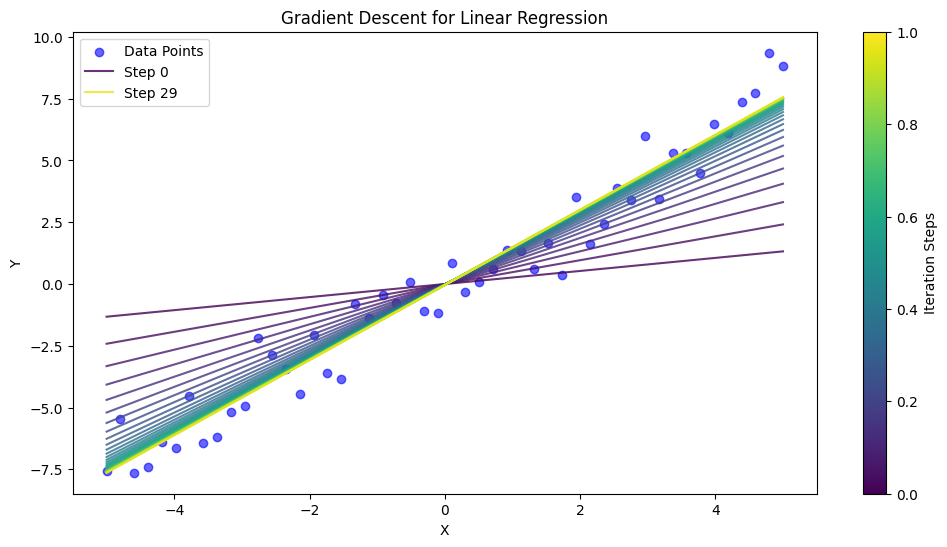

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent for Linear Function

def linear_model(x, m, c):
    return m * x + c

def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def gradients(x, y, m, c):
    y_pred = linear_model(x, m, c)
    error = y - y_pred
    dm = -2 * (x * error).mean()
    dc = -2 * error.mean()
    return dm, dc

# Generate synthetic data
x = np.linspace(-5, 5, 50)
y = 1.5 * x + np.random.normal(0, 1, len(x))

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 30

# Initial guess
m, c = 0, 0

# Storing the iteration history for visualization
history = []

# Gradient Descent Algorithm
for i in range(n_iterations):
    dm, dc = gradients(x, y, m, c)
    m -= learning_rate * dm
    c -= learning_rate * dc
    y_pred = linear_model(x, m, c)
    error = mse(y, y_pred)
    history.append((m, c, error))

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the data points
plt.scatter(x, y, color='blue', alpha=0.6, label='Data Points')

# Plotting the fitted lines for each iteration
for i, (m, c, error) in enumerate(history):
    y_pred = linear_model(x, m, c)
    plt.plot(x, y_pred, color=plt.cm.viridis(i / n_iterations), alpha=0.8, label=f'Step {i}' if i in [0, n_iterations-1] else "")

plt.title('Gradient Descent for Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Iteration Steps')
plt.show()


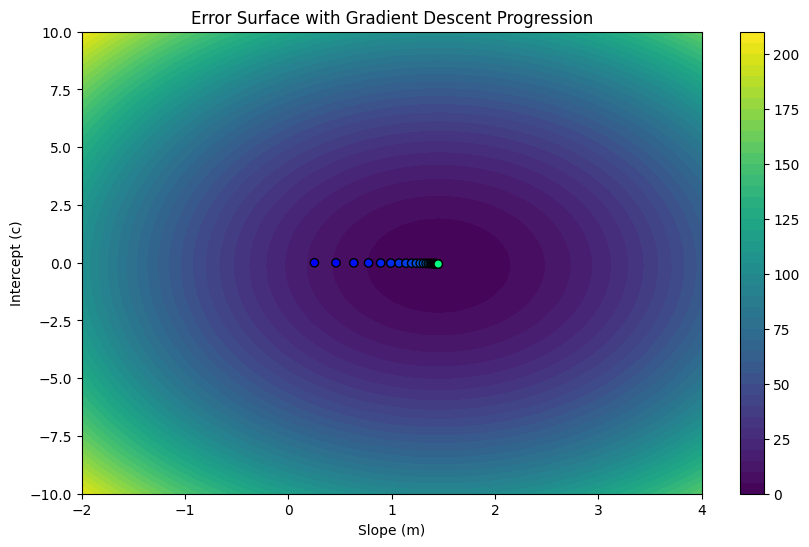

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def linear_model(x, m, c):
    return m * x + c

def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def gradients(x, y, m, c):
    y_pred = linear_model(x, m, c)
    error = y - y_pred
    dm = -2 * (x * error).mean()
    dc = -2 * error.mean()
    return dm, dc

# Generate synthetic data
x = np.linspace(-5, 5, 50)
y = 1.5 * x + np.random.normal(0, 1, len(x))

# Gradient Descent Parameters
learning_rate = 0.01
n_iterations = 30

# Initial guess
m, c = 0, 0

# Storing the iteration history
history = []

# Gradient Descent Algorithm
for i in range(n_iterations):
    dm, dc = gradients(x, y, m, c)
    m -= learning_rate * dm
    c -= learning_rate * dc
    y_pred = linear_model(x, m, c)
    error = mse(y, y_pred)
    history.append((m, c, error))

# Plotting the error surface
m_range = np.linspace(-2, 4, 100)
c_range = np.linspace(-10, 10, 100)
M, C = np.meshgrid(m_range, c_range)
Error = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = linear_model(x, M[i, j], C[i, j])
        Error[i, j] = mse(y, y_pred)

plt.figure(figsize=(10, 6))

# Plot error surface
cp = plt.contourf(M, C, Error, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Error Surface with Gradient Descent Progression')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (c)')

# Plot the progression of the parameters
m_values, c_values, _ = zip(*history)
plt.scatter(m_values, c_values, c=np.arange(len(m_values)), cmap='winter', edgecolor='black')

plt.show()


## It's a trap!

(c) Admiral Akbar

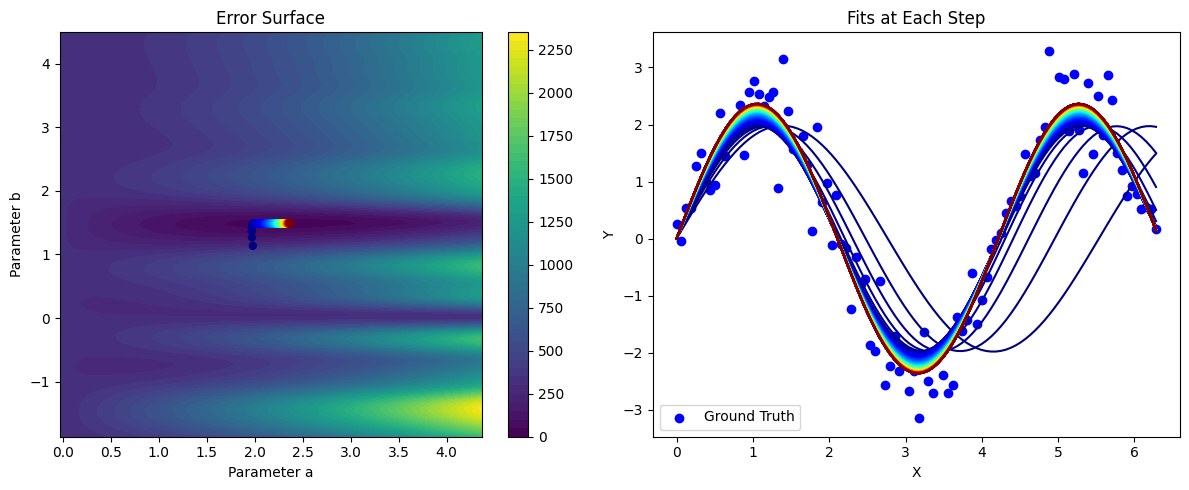

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import jet

# Define the sinusoidal model function
def sinusoidal_model(x, a, b):
    return a * np.sin(b * x)

# Define the error (cost) function
def error_function(params, x, y):
    a, b = params
    y_pred = sinusoidal_model(x, a, b)
    return np.sum((y - y_pred) ** 2)

# Generate synthetic data
x_data = np.linspace(0, 2 * np.pi, 100)
y_data = 2.5 * np.sin(1.5 * x_data) + np.random.normal(0, 0.5, len(x_data))

# Gradient descent parameters
learning_rate = 0.0001
n_iterations = 300

# Initial guess for parameters a and b
a, b = 2.0, 1 #2.0, 4

# Storing the iteration history
history = []

# Gradient Descent Algorithm
for _ in range(n_iterations):
    # Predicted y
    y_pred = sinusoidal_model(x_data, a, b)
    # Calculate gradients
    grad_a = -2 * np.sum((y_data - y_pred) * np.sin(b * x_data))
    grad_b = -2 * np.sum((y_data - y_pred) * a * x_data * np.cos(b * x_data))
    # Update parameters
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    # Store history
    history.append((a, b, error_function([a, b], x_data, y_data)))

# Adjusting the range of the error surface plot
a_values, b_values, _ = zip(*history)
a_range = np.linspace(min(a_values) - 2, max(a_values) + 2, 100)
b_range = np.linspace(min(b_values) - 3, max(b_values) + 3, 100)
A, B = np.meshgrid(a_range, b_range)
Error = np.array([[error_function([ai, bi], x_data, y_data) for ai in a_range] for bi in b_range])


# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Error Surface Plot
cp = ax[0].contourf(A, B, Error, levels=50, cmap='viridis')
fig.colorbar(cp, ax=ax[0])
ax[0].set_title('Error Surface')
ax[0].set_xlabel('Parameter a')
ax[0].set_ylabel('Parameter b')

# Plot the gradient descent path with color corresponding to the step number
norm = plt.Normalize(0, n_iterations)
for i, (a, b, _) in enumerate(history):
    ax[0].scatter(a, b, color=jet(norm(i)), edgecolor= 'none')

# Plot fits at each step
for i, (a, b, _) in enumerate(history):
    y_pred = sinusoidal_model(x_data, a, b)
    ax[1].plot(x_data, y_pred, color=jet(norm(i)), alpha=1)

ax[1].scatter(x_data, y_data, color='blue', label='Ground Truth')
ax[1].set_title('Fits at Each Step')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()

plt.tight_layout()
plt.show()


Excercise:
- Experiment with different inital parameters to see when we get trapped
- Does the learning rate matter?